### Import Libraries

In [1]:
import pandas as pd # for data processing
import numpy as np # for linear algebra
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn import tree # to visualize decision tree
from sklearn.tree import DecisionTreeClassifier # Classification model
from sklearn.model_selection import train_test_split # for train test Split
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.metrics import accuracy_score # to see the accuracy

### Load Data

In [2]:
df = pd.read_csv('Iris.csv')
df.head() # shows Top 5 records of the data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape # to see no of rows and columns

(150, 6)

In [4]:
df.isnull().sum() # to see if there are any null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.drop('Id',axis=1,inplace=True) # drop Id beacuse not important
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info() # to see data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe() # for statistics of columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

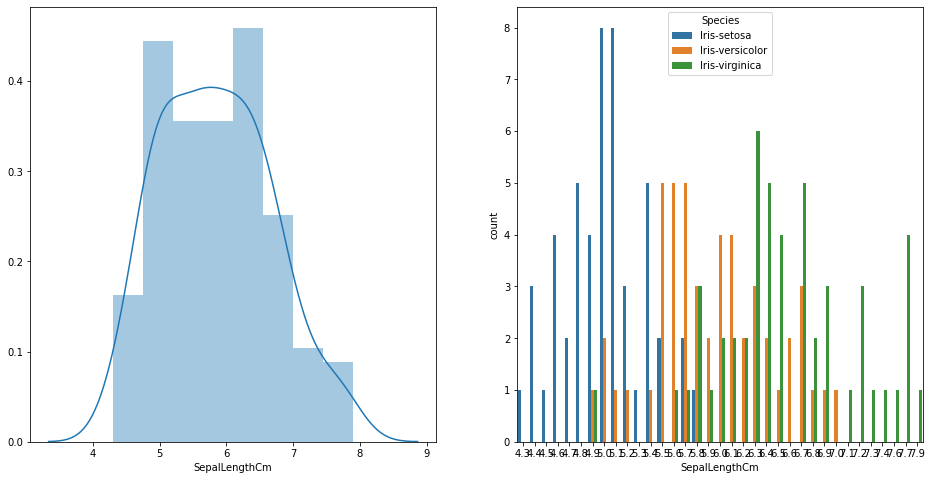

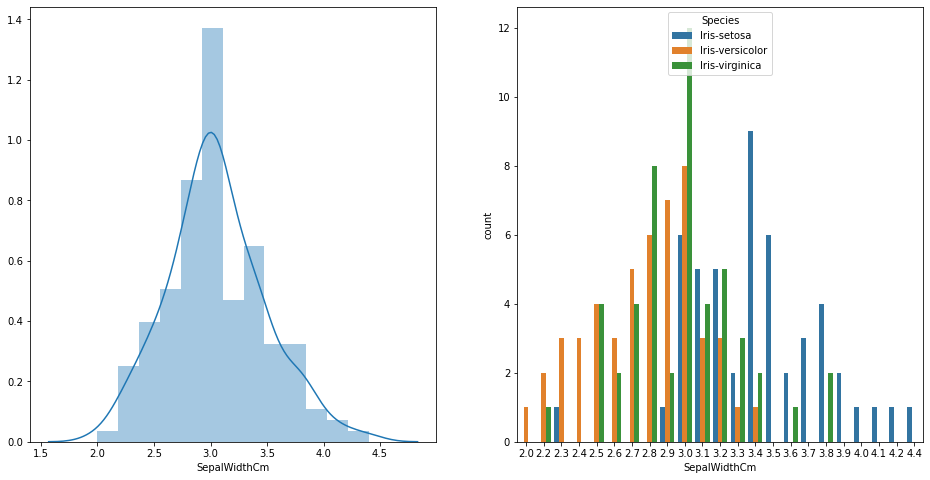

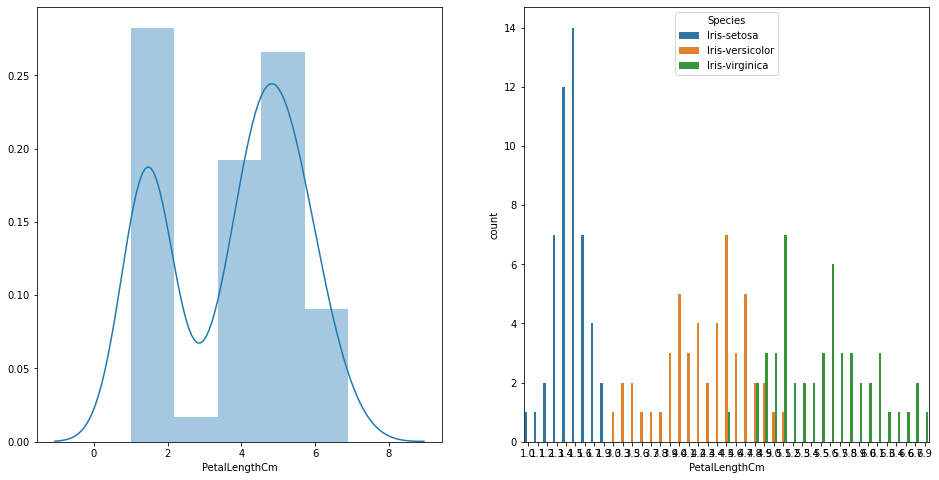

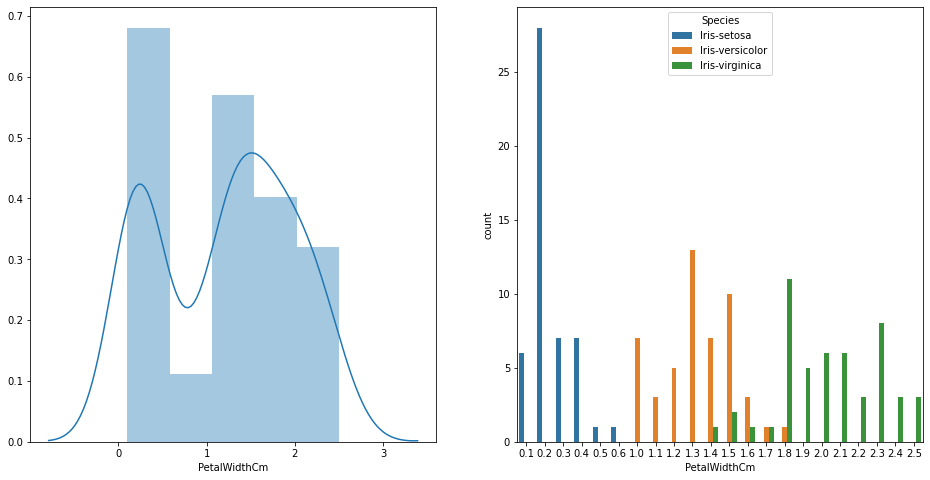

In [8]:
for i in df.columns[:-1]:
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    sns.countplot(df[i],hue='Species',data=df)
    plt.show()

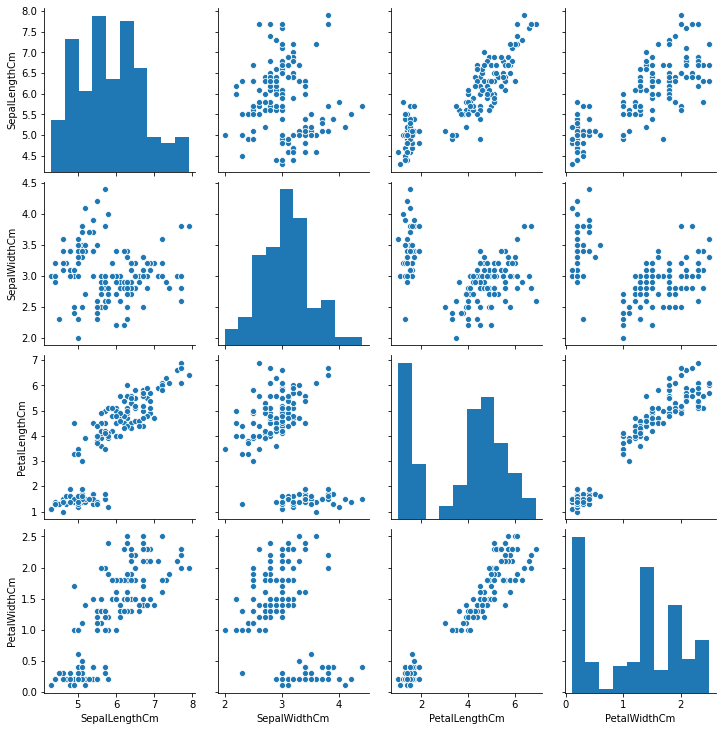

In [9]:
sns.pairplot(df)

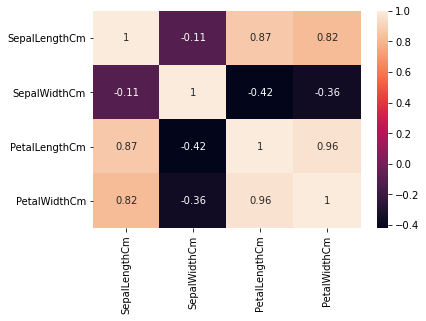

In [10]:
sns.heatmap(df.corr(),annot=True)

### Dependent And Indepent Featues

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Encode y

In [12]:
y ,labels = y.factorize()

In [13]:
labels

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

1. Iris-setosa : 0
2. Iris-versicolor:1
3. Iris-virginica:2

###  Train test split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

### Model Creation

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Train Data : ",accuracy_score(y_train,model.predict(X_train)))
print("Test Data : ",accuracy_score(y_test,model.predict(X_test)))

Train Data :  1.0
Test Data :  0.9666666666666667


### Plot Decision Tree

[Text(418.5, 489.24, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(354.11538461538464, 380.52000000000004, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(482.8846153846154, 380.52000000000004, 'X[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(257.53846153846155, 271.8, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(128.76923076923077, 163.08000000000004, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(64.38461538461539, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(193.15384615384616, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 163.08000000000004, 'X[3] <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(321.9230769230769, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(450.69230769230774, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(708.2307692307

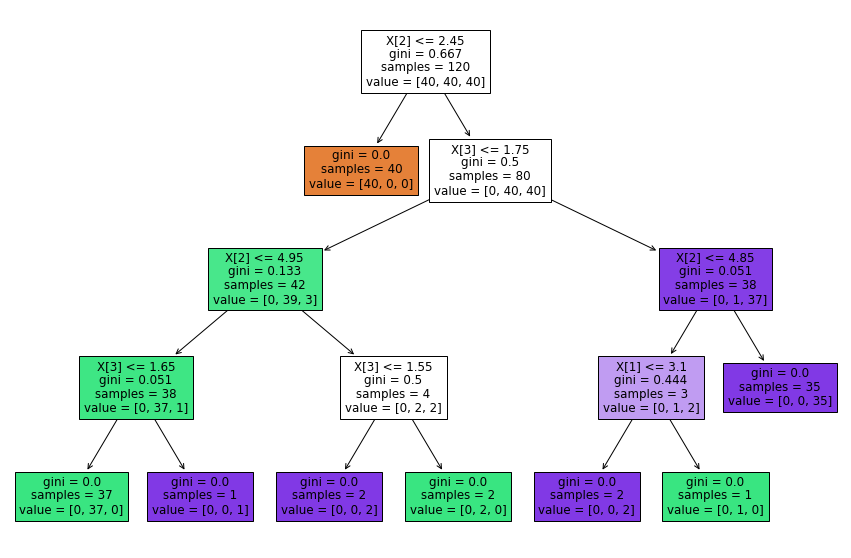

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

### Decision Tree With Max-Depth of 2

In [18]:
model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(X_train,y_train)
print("Train Data : ",accuracy_score(y_train,model1.predict(X_train)))
print("Test Data : ",accuracy_score(y_test,model1.predict(X_test)))

Train Data :  0.9666666666666667
Test Data :  0.9333333333333333


[Text(334.8, 453.0, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(334.8, 90.59999999999997, 'gini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(669.6, 90.59999999999997, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

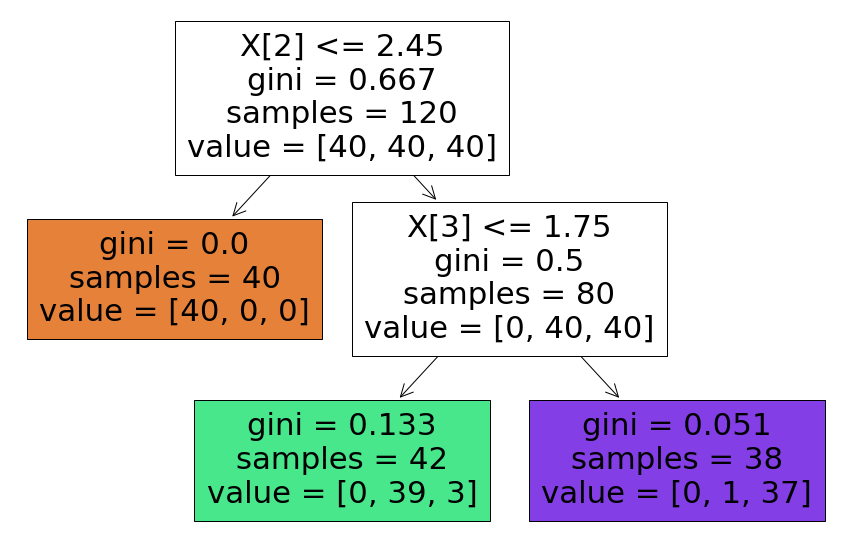

In [19]:
plt.figure(figsize=(15,10))
tree.plot_tree(model1,filled=True)

### Decision Tree With Max-Depth of 3

In [20]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train,y_train)
print("Train Data : ",accuracy_score(y_train,model2.predict(X_train)))
print("Test Data : ",accuracy_score(y_test,model2.predict(X_test)))

Train Data :  0.9666666666666667
Test Data :  0.9333333333333333


[Text(313.875, 475.65000000000003, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(209.25, 339.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(418.5, 339.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(209.25, 203.85000000000002, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(104.625, 67.94999999999999, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(313.875, 67.94999999999999, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(627.75, 203.85000000000002, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(523.125, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(732.375, 67.94999999999999, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

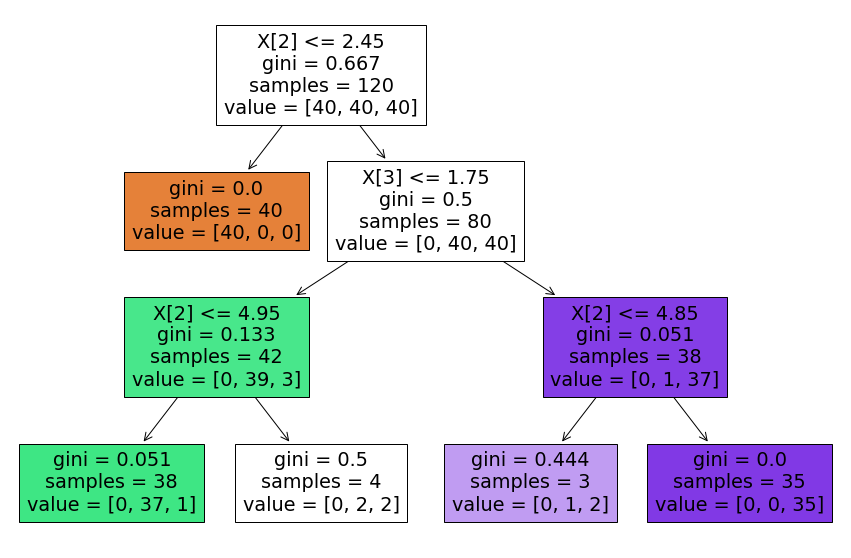

In [21]:
plt.figure(figsize=(15,10))
tree.plot_tree(model2,filled=True)